# 군집분석이란?

1. 군집분석이란
    - 서로 유사한 정도에따라 다수의 객체를 군집으로 나누는 작업 또는 이에 기반한 분석을 의미한다.
    - 유사도가 높은 데이터끼리 그룹화(대표적으로 유클리드 거리계산식을 이용) 
    - 계층별 클러스터링과 비게층형 클러스트링으로 분류
    - 주요 알고리즘 : K-means, hierarchical 등 
<br>
2. 군집분석의 특징
    - 종속변수(y)가 없는 데이터 마이닝 기법(비지도 학습) 
    - 유클리드 거리 기반 유사 객체 묵음(유사성 = 유클리드 거리)
    - 전체적인 데이터 구조를 파악하는데 이용
    - 분석 결과에 대한 가설 검정 없음(타당성 검증 방법 없음)
    - 계층적 군집분석(탐색적), 비계층적 군집분석(확인적) 
<br>

3. 계층적 군집분석(hierarchical)
    - 유클리드 거리를 이용한 군집분석 방법
    - 계층적으로 군집 결과 도출
    - 탐색적 군집 분석
    - 계층적 군집 분석의 결과 : 덴드로그램(Dendrogram) - 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림 
    - 군집 수는 사용자가 정할 수 있음
    
<br>

4. 비계층적 군집분석(k-means)
    - 계층적 군집보다 속도 빠름
    - 군집의 수를 알고 있는 경우 이용
    - k는 미리 정하는 군집 수 
    - 확인적 군집분석
    - 계층적 군집화의 결과에 의거하여 군집 수 결정
    - 변수보다 관측대상 군집화에 많이 이용
    - 군집의 중심(Cluster center)은 사용자가 정함
    
<br>

5. k-means 군집분석 알고리즘
    - 1) k값을 초기값으로 k개의 centroid 선정(랜덤)
    - 2) 각 데이터 포인터를 가장 가까운 centroid에 할당
    - 3) centroid에 할당된 모든 데이터 포인터의 중심 위치 계산(centroid 재조정)
    - 4) 재조정된 centroid와 가장 가까운 데이터 포인트 할당 
    - centroid 재조정이 발생되지 않을 때까지 3),4)단계 반복


In [37]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
from IPython.display import Image
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
%config InlineBackend.figure_foramt = 'retina'
# 자동완성 속도 증가
%config Completer.use_jedi = False
# 한글 깨짐 해결
plt.rc('font', family='D2coding')
mpl.rc('axes', unicode_minus=False)

# hierarchical_계층적 군집 분석
- 유클리드 거리계산식 이용

In [36]:
# 계층적 군집 분석 함수

iris = load_iris()

In [61]:
iris.feature_name

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [63]:
cols = ['sepal length (cm)',
        'sepal width (cm)',
        'petal length (cm)',
        'petal width (cm)']
iris_df = pd.DataFrame(iris.data, columns=cols)
iris_df['labels'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
# feature_names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
# X, y = load_iris(return_X_y = True)
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 계층적 군집 분석 - 덴드로그램

In [38]:
# 계층적 군집 분석의 연결방식 : 단순연결(single), 완전연결(complete), 평균연결방식(average)
# 기본이 완전연결, 유클리드거리
# y는 데이터 프레임 형태
cluster = linkage(y=iris_df, method='complete', metric='euclidean')
cluster.shape

(149, 4)

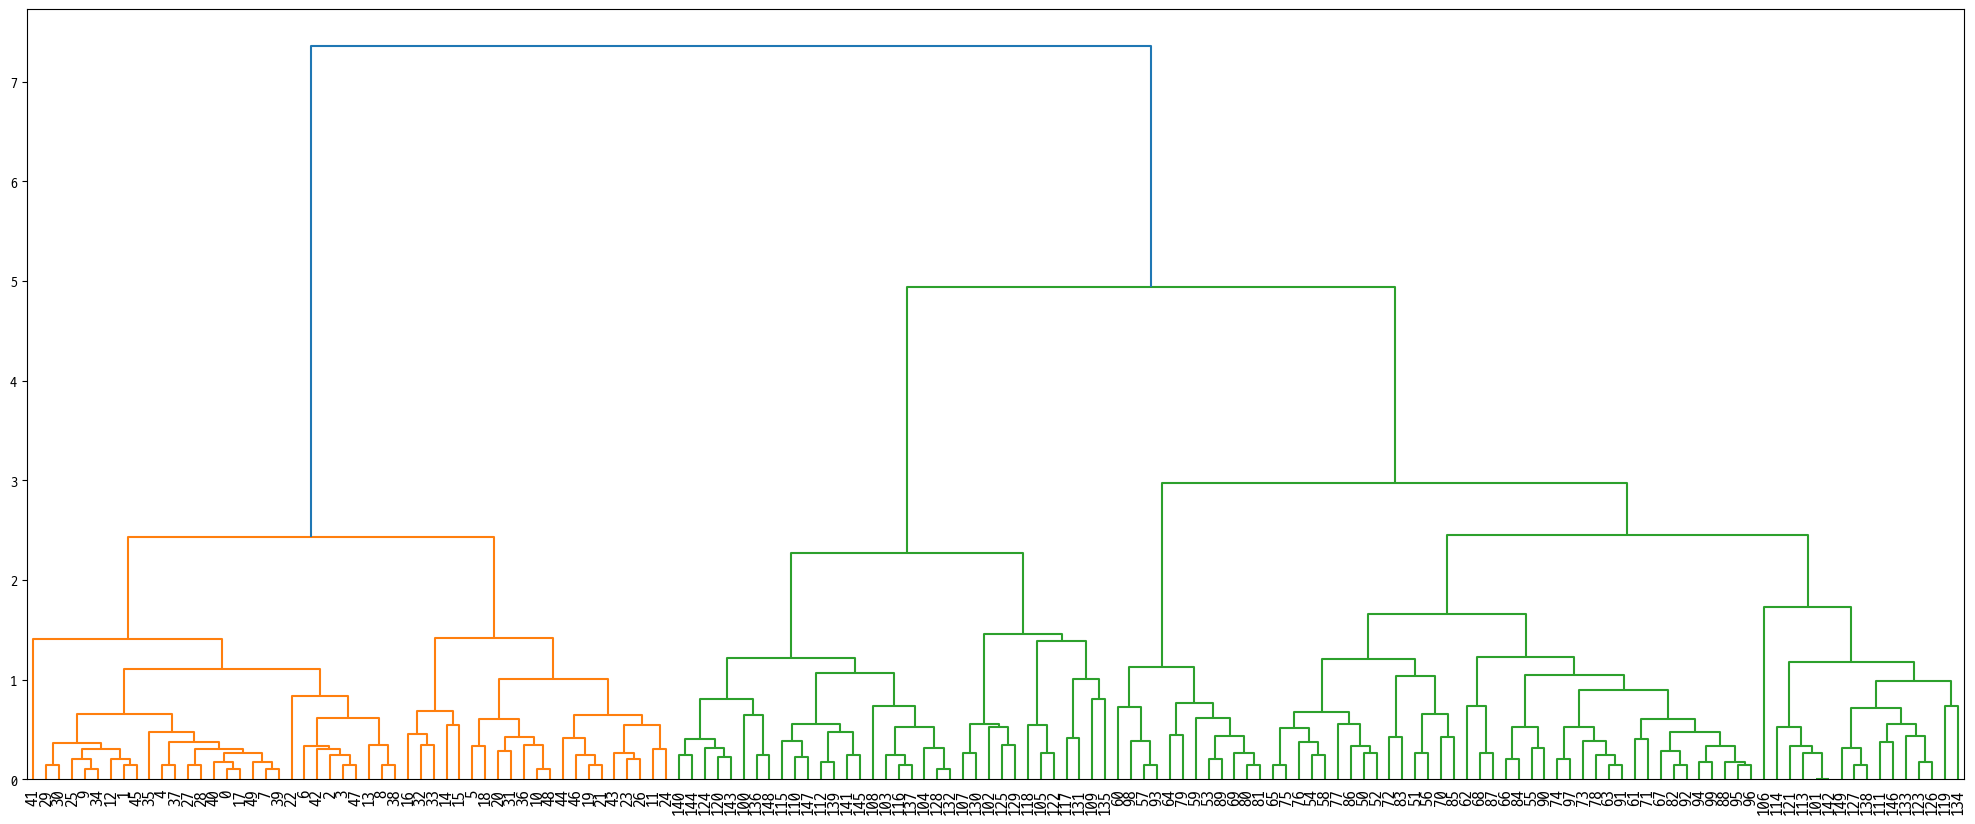

In [18]:
# 군집수 결정 : 덴드로그램 시각화
plt.figure(figsize=(25, 10))
# leaf_rotation = 90 글자 각도
# leaf_font_size = 12 글자 크기
dendrogram(cluster, leaf_rotation=90, leaf_font_size=12)
plt.show()

In [32]:
# 클러스터링 결과

cut_tree = fcluster(cluster, t=3, criterion='distance')

# prediction
cut_tree

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [31]:
labels = iris_df['target']  # 정답
df = pd.DataFrame({'pred': cut_tree, 'target': labels})
df

,pred,target
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,2,2
146,3,2
147,2,2
148,2,2


In [30]:
con_mat = pd.crosstab(df['pred'], df['target'])  # 교차행렬만들어라
con_mat
# pred의 1,2,3은 labels의 0,1,2와 같다.
# 잘 못 골라냄

target,0,1,2
pred,,,
1,50,0,0
2,0,0,34
3,0,50,16


In [29]:
# iris_df에 군집 예측치를 추가
iris_df.head()
iris_df['cluster'] = cut_tree

In [64]:
# 클러스터로 분리된 값 산점도 시각화
plt.scatter(x=iris_df['sepal length (cm)'],
            y=iris_df['petal length (cm)'],
            c=iris_df['cluster'])
plt.show()

KeyError: 'cluster'

In [26]:
# 클러스터 빈도수
iris_df['target'] = iris.target
iris_df['cluster'].value_counts()

3    66
1    50
2    34
Name: cluster, dtype: int64

In [39]:
# 각 클러스터별 통계
cluster_g = iris_df.groupby('cluster').mean()
cluster_g

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
cluster,,,,,
1,5.006000,3.428000,1.462000,0.246000,0.000000
2,6.888235,3.100000,5.805882,2.123529,2.000000
3,5.939394,2.754545,4.442424,1.445455,1.242424


# k-means : 비계층적 군집분석

In [41]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [43]:
# target을 제외한 feature를 이용해서 데이터 프레임을 생성
iris = load_iris()
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

C:\Anaconda3\envs\deep\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [45]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [46]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_

iris_result = iris_df.groupby(['target', 'cluster']).size()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
dtype: int64

스케일링 필수!

In [47]:
from sklearn.decomposition import PCA

# PCA 차원축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


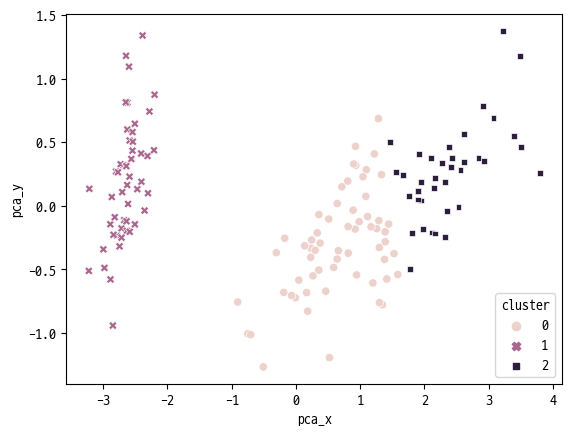

In [49]:
sns.scatterplot(x='pca_x', y='pca_y', data=iris_df,
                hue='cluster', style='cluster')
plt.show()

In [52]:
# kmeans.predict()
pred = kmeans.predict(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [53]:
len(pred)

150

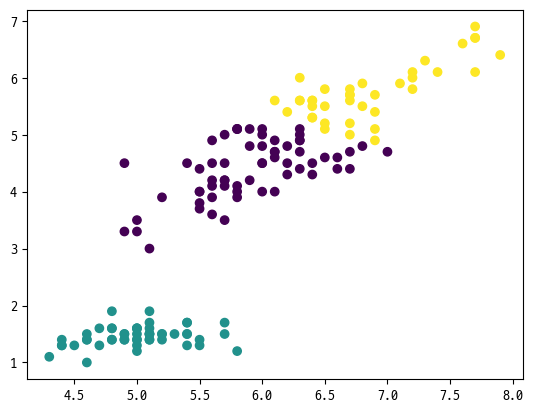

In [54]:
# 군집결과 시각화
plt.scatter(x=iris_df['sepal_length'], y=iris_df['petal_length'], c=pred)
plt.show()

In [56]:
centers = kmeans.cluster_centers_
centers

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

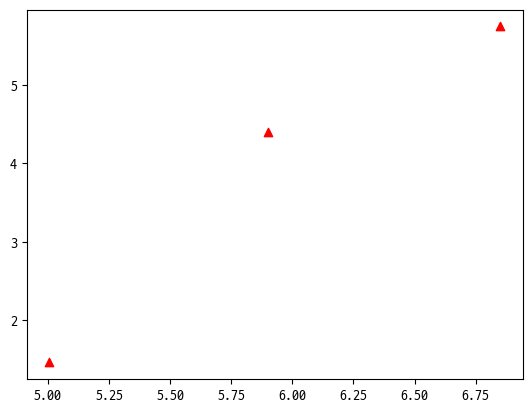

In [60]:
# 군집별 중앙값 시각화
plt.scatter(x=centers[:, 0], y=centers[:, 2], marker='^', c='r')

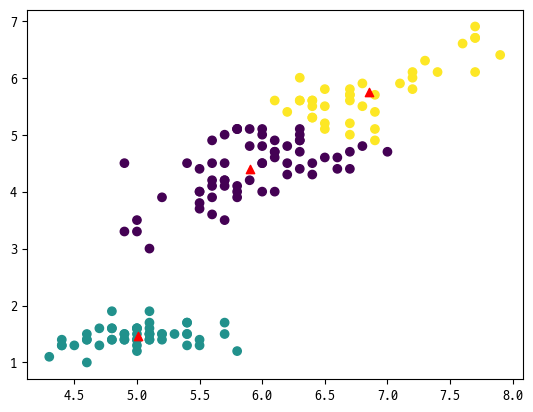

In [59]:
plt.scatter(x=iris_df['sepal_length'], y=iris_df['petal_length'], c=pred)
plt.scatter(x=centers[:, 0], y=centers[:, 2], marker='^', c='r')
plt.show()